In [23]:

source('lib.R')

In [3]:
load('F1.Oct.RData')


In [4]:
# read conos object
con1=readRDS('Nomral_Ptumor_conos.rds')


In [5]:
# factor of sample fraction
stype = as.factor(stype)
fraction.palette1=c("#00FFFFFF","#FF0000FF")
names(fraction.palette1)=levels(stype)

fraction.palette1f <- function(n) return(fraction.palette1[1:n])


In [7]:
table(stype)

stype
Normal  Tumor 
 35827 110460 

In [6]:
embForMat2 = function(gg){
  gg = gg +   theme_bw() + theme(panel.background = element_blank(), plot.margin = margin(0.1, 0.1, 0.1, 0.1, "cm")) +
      theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.text.y = element_blank())+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))  +theme(legend.position = 'none') #+guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title=''))
  return(gg)
}
embForMat <- function(gg){
  gg = gg +   theme_bw() + theme(panel.background = element_blank(), plot.margin = margin(0.1, 0.1, 0.1, 0.1, "cm")) +
      theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks = element_blank(),
            axis.title.y = element_blank(), axis.text.y = element_blank())+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))+guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title=''))
  return(gg)
}

In [8]:
stype=ordered(as.factor(stype),levels=c('Normal','Tumor'))  

sample.groups <- tapply(ssamp,stype,unique)
sample.groups <- as.factor(setNames(rep(names(sample.groups),unlist(lapply(sample.groups,length))),unlist(sample.groups)))

sample.groups

RCC-PR6-Normal  RCC-PR8-Normal  RCC-PR9-Normal  RCC-PR5-Normal  RCC-BM1-Normal 
         Normal          Normal          Normal          Normal          Normal 
 RCC-BM2-Normal  RCC-PR1-Normal  RCC-PR2-Normal  RCC-PR4-Normal  RCC-PR3-Normal 
         Normal          Normal          Normal          Normal          Normal 
 RCC-PR6-PTumor  RCC-PR7-PTumor  RCC-PR9-PTumor RCC-PR5-PTumor1 RCC-PR5-PTumor2 
          Tumor           Tumor           Tumor           Tumor           Tumor 
RCC-PR5-PTumor3  RCC-BM1-PTumor RCC-BM2-PTumor1 RCC-BM2-PTumor2  RCC-PR2-PTumor 
          Tumor           Tumor           Tumor           Tumor           Tumor 
 RCC-PR4-PTumor RCC-PR3-PTumor1 RCC-PR3-PTumor2 RCC-PR3-PTumor3 
          Tumor           Tumor           Tumor           Tumor 
Levels: Normal Tumor

In [9]:
annot=readRDS('cell.ano.rds')
annot.pal <- setNames(sample(rainbow(length(levels(annot)),v=0.95,s=0.7)),levels(annot));
annot.palf <- function(n) return(annot.pal[1:n])


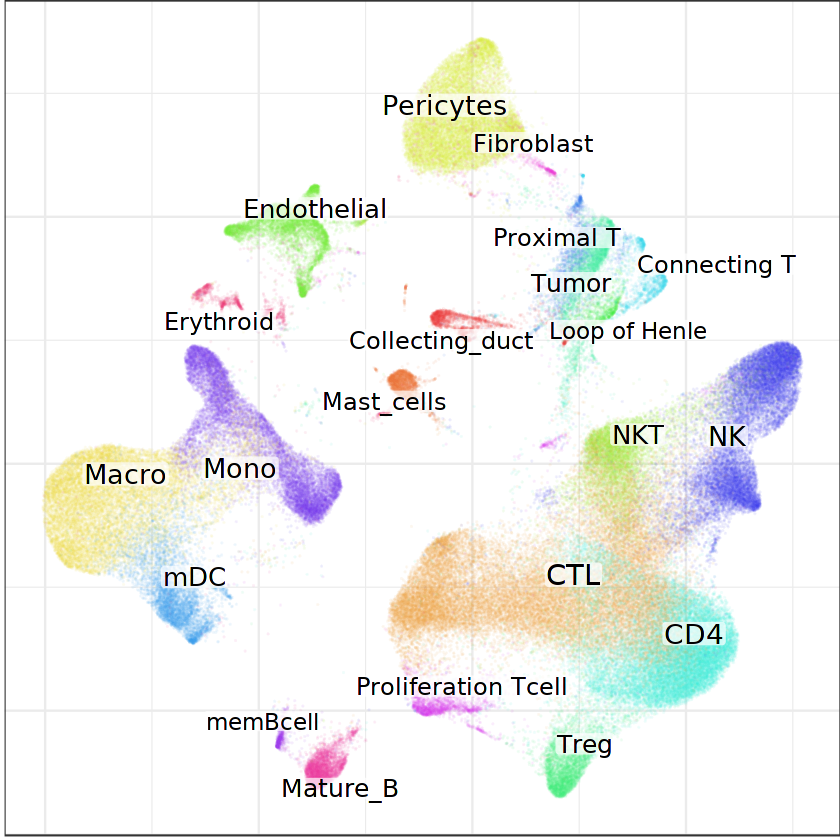

In [10]:
a1 <- con1$plotGraph(alpha=0.05,font.size = c(4.7,6),size=0.1, groups=annot, plot.na=F, mark.groups=T, palette=annot.palf, raster=TRUE)
a1

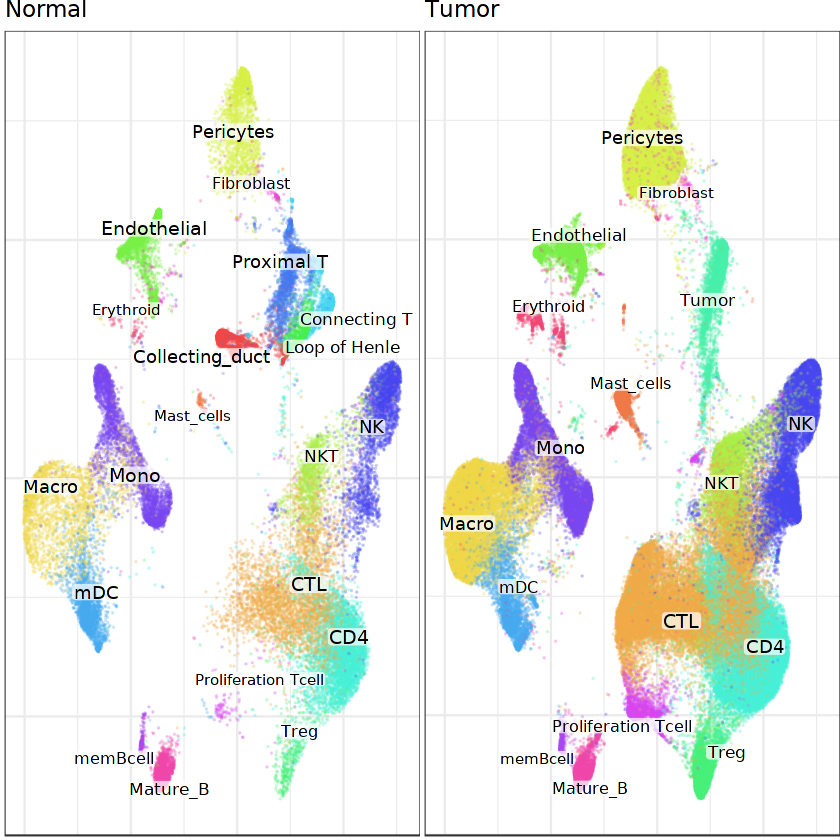

In [11]:
# visulization of major cell populations
pl=lapply(sn(levels(stype)),function(x) {
  con1$plotGraph(alpha=0.2,font.size = c(3,4),size=0.15, groups=annot[names(stype[stype==x])], plot.na=F, mark.groups=T, palette=annot.palf, raster=TRUE,title=x)
})

b=cowplot::plot_grid(plotlist=pl,nrow=1)
#b
b

Using SampleType as value column: use value.var to override.



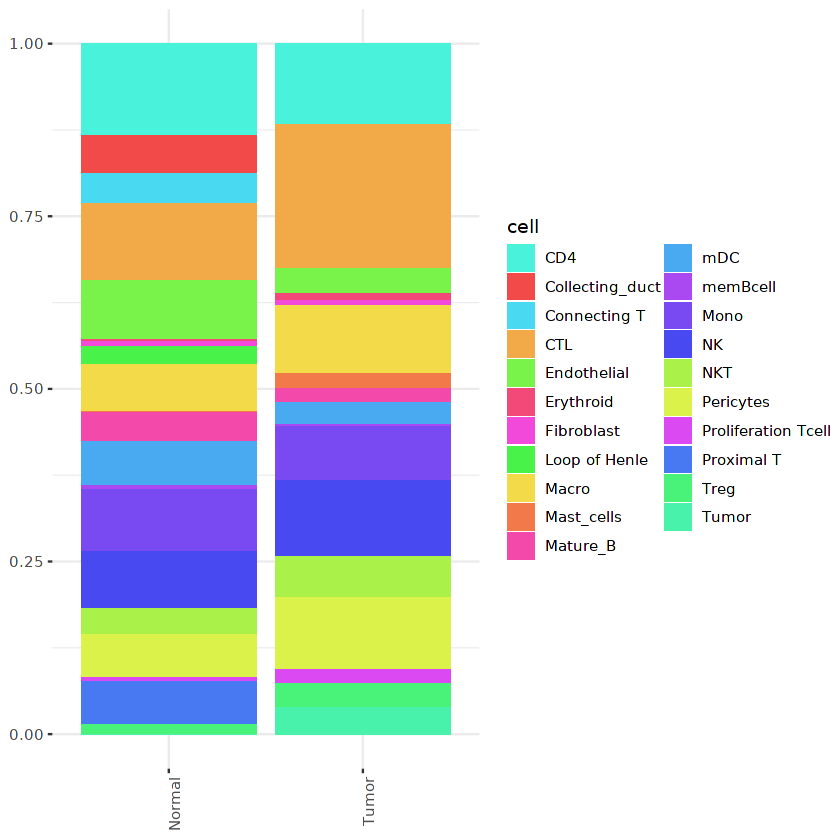

In [12]:
library(reshape2)
cname=intersect(cname,names(stype))
ano2=data.frame('Cell'=annot[cname],'SampleType'=stype[cname])


# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
#head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')
#head(tmp4)


p=ggplot(tmp4, aes(x=sample, fill=cell, y = pc.of.sample)) +theme_bw()+
  geom_bar(stat='identity', position='fill') + 
  scale_fill_manual(values=annot.pal)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title.y=element_blank(),panel.border = element_blank(),
        axis.title.x=element_blank())

p 


In [13]:
n1=sample.groups[sample.groups=='Normal'] %>% Toch()

n2=sample.groups[sample.groups=='Tumor'] %>% Toch()
n1
n2

RCC-PR6-Normal RCC-PR8-Normal RCC-PR9-Normal RCC-PR5-Normal RCC-BM1-Normal 
      "Normal"       "Normal"       "Normal"       "Normal"       "Normal" 
RCC-BM2-Normal RCC-PR1-Normal RCC-PR2-Normal RCC-PR4-Normal RCC-PR3-Normal 
      "Normal"       "Normal"       "Normal"       "Normal"       "Normal"

RCC-PR6-PTumor  RCC-PR7-PTumor  RCC-PR9-PTumor RCC-PR5-PTumor1 RCC-PR5-PTumor2 
        "Tumor"         "Tumor"         "Tumor"         "Tumor"         "Tumor" 
RCC-PR5-PTumor3  RCC-BM1-PTumor RCC-BM2-PTumor1 RCC-BM2-PTumor2  RCC-PR2-PTumor 
        "Tumor"         "Tumor"         "Tumor"         "Tumor"         "Tumor" 
 RCC-PR4-PTumor RCC-PR3-PTumor1 RCC-PR3-PTumor2 RCC-PR3-PTumor3 
        "Tumor"         "Tumor"         "Tumor"         "Tumor"

In [14]:
ssamp=ssamp[names(annot)]
pl1=lapply(sn(names(n1)), function(x)  {
  cnf = names(ssamp[ssamp==x])
  con1$plotGraph(groups=annot[cnf],plot.na=F,alpha=0.1,size=0.1, mark.groups=F,palette=annot.palf,raster=T, raster.width=1,raster.height=1)+annotate("text", Inf, -Inf, label = x,vjust = -2,hjust = 1.3,size=4.4 )
})


Normal  Tumor 
 30000  30000 


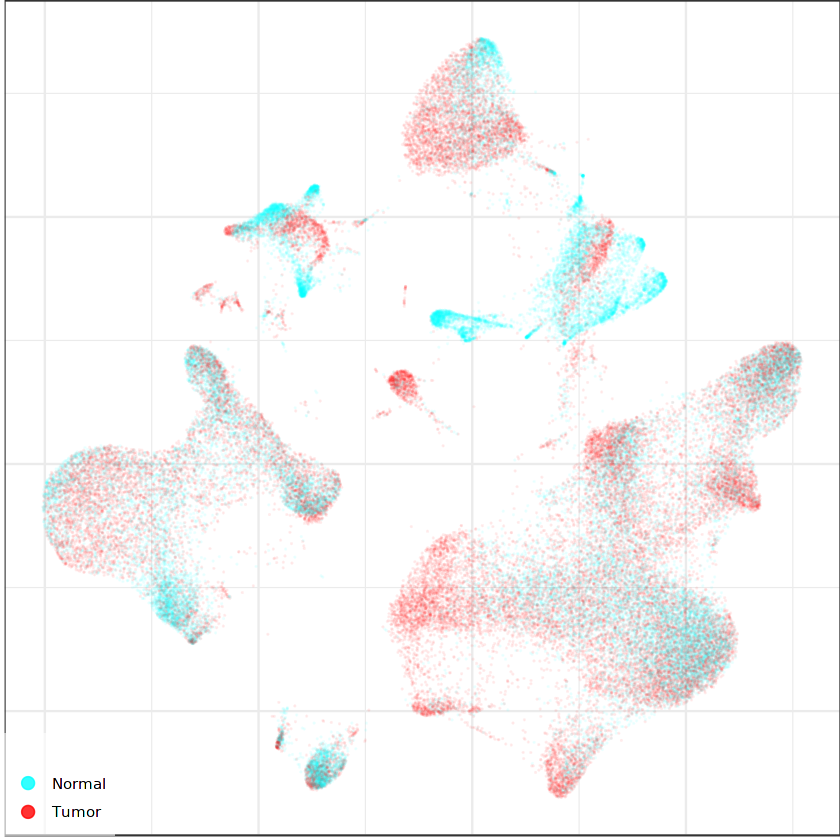

In [18]:
fraction.palette1f <- function(n) return(fraction.palette1[1:n])

cell.frac=sampleDwon(stype[cname],30000)
cell.frac=stype[cell.frac]

p4 <- con1$plotGraph(groups=cell.frac,plot.na=F,alpha=0.05,size=0.1,mark.groups=F, show.legend=T,raster =TRUE, legend.position=c(0, 0),palette=fraction.palette1f) +
  guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title=''))

p4

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,CD4,RCC-BM1-Normal,0.075252023
2,Collecting_duct,RCC-BM1-Normal,0.052250461
3,Connecting T,RCC-BM1-Normal,0.030100809
4,CTL,RCC-BM1-Normal,0.063893227
5,Endothelial,RCC-BM1-Normal,0.157603294
6,Erythroid,RCC-BM1-Normal,0.006673293


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


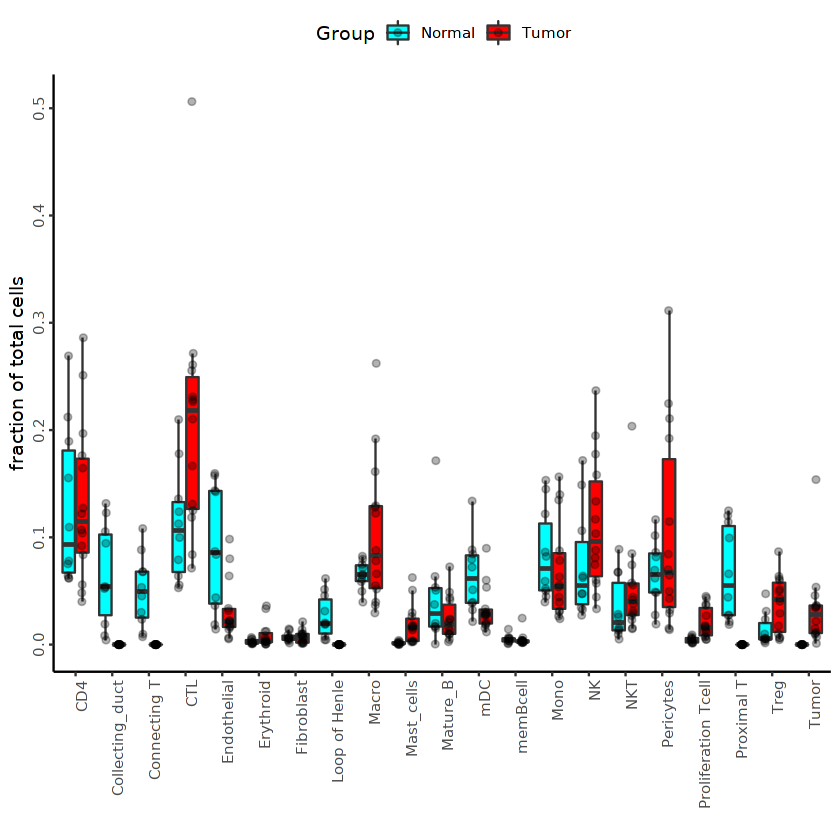

In [19]:
cname=names(annot)
ano2=data.frame('Cell'=annot[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)
tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)
names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


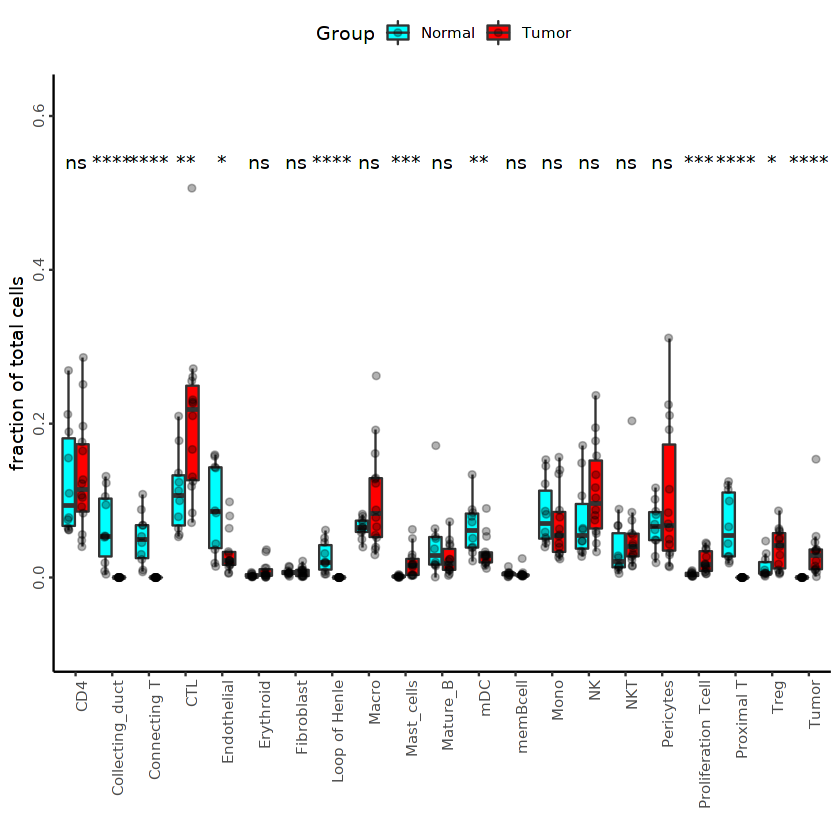

In [20]:
p=p+ scale_y_continuous(expand = c(0.08, 0.08), limits=c(min(tmp4$pc.of.sample), max(tmp4$pc.of.sample) * 1.05))+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5)
p